In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [14]:
train_data = 'E:\\workspace\\ML_study\\AI_project\\dataset1\\train\\'
valid_data = 'E:\\workspace\\ML_study\\AI_project\\dataset1\\valid\\'
test_data = 'E:\\workspace\\ML_study\\AI_project\\dataset1\\test\\'

In [15]:
image_size = (224, 224)
batch_size = 16
epochs = 100
patience = 15
# patience: 학습 조기종료 인자. val_loss가 15epoch 동안 낮아지지 않으면 학습 종료

In [16]:
# directory tree
# |- train
#     |- non_died
#     |- you_died
# |- valid
#     |- non_died
#     |- you_died
train_set = image_dataset_from_directory(
    train_data,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)
valid_set = image_dataset_from_directory(
    valid_data,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

Found 1597 files belonging to 2 classes.
Found 429 files belonging to 2 classes.


In [17]:
labels = train_set.class_names
print(labels)
# ['non_died', 'you_died']

['non_died', 'you_died']


In [18]:
# 학습 데이터 섞기
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_set = valid_set.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
# 데이터 증강
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip(
            'horizontal',
            input_shape=(224, 224, 3)
        ),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

In [20]:
# 모델 구조 VGG-16 모방
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(224, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(224, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(112, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(112, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(56, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(56, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(28, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(28, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(14, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(14, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])


In [21]:
model.compile(
    optimizer='Adam',# tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 224)     6272      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 224)     451808    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 224)    0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 112)     225904    
                                                      

In [22]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=patience) # patience :: 참을성 인자, val_loss 값이 더이상 줄어들지 않으면 조기 종료
    # tf.keras.callbacks.ModelCheckpoint('save_at_{epoch}.h5'), # 학습 중간저장 체크포인트
]

In [23]:
history = model.fit(
    train_set,
    validation_data=valid_set,
    callbacks=callbacks,
    epochs=epochs
)

Epoch 1/100
100/100 [==============================] - 106s 905ms/step - loss: 0.6777 - accuracy: 0.5667 - val_loss: 0.5085 - val_accuracy: 0.7972
Epoch 2/100
100/100 [==============================] - 86s 862ms/step - loss: 0.3839 - accuracy: 0.8497 - val_loss: 0.2525 - val_accuracy: 0.9021
Epoch 3/100
100/100 [==============================] - 86s 864ms/step - loss: 0.1719 - accuracy: 0.9487 - val_loss: 0.1519 - val_accuracy: 0.9557
Epoch 4/100
100/100 [==============================] - 89s 888ms/step - loss: 0.1245 - accuracy: 0.9693 - val_loss: 0.0751 - val_accuracy: 0.9814
Epoch 5/100
100/100 [==============================] - 91s 913ms/step - loss: 0.0894 - accuracy: 0.9806 - val_loss: 0.0660 - val_accuracy: 0.9837
Epoch 6/100
100/100 [==============================] - 88s 882ms/step - loss: 0.0489 - accuracy: 0.9881 - val_loss: 0.0426 - val_accuracy: 0.9860
Epoch 7/100
100/100 [==============================] - 89s 886ms/step - loss: 0.0218 - accuracy: 0.9906 - val_loss: 0.0430 

Epoch 57/100
100/100 [==============================] - 91s 907ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0271 - val_accuracy: 0.9977
Epoch 58/100
100/100 [==============================] - 91s 907ms/step - loss: 0.0166 - accuracy: 0.9975 - val_loss: 0.0256 - val_accuracy: 0.9977
Epoch 59/100
100/100 [==============================] - 90s 903ms/step - loss: 0.0164 - accuracy: 0.9969 - val_loss: 0.0238 - val_accuracy: 0.9977
Epoch 60/100
100/100 [==============================] - 90s 903ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0206 - val_accuracy: 0.9977
Epoch 61/100
100/100 [==============================] - 91s 910ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.0259 - val_accuracy: 0.9977
Epoch 62/100
100/100 [==============================] - 90s 905ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0300 - val_accuracy: 0.9977


In [24]:
model.save('./save_model_8')
model.save('./save_model_8.h5', save_format='h5')

INFO:tensorflow:Assets written to: ./save_model_8\assets


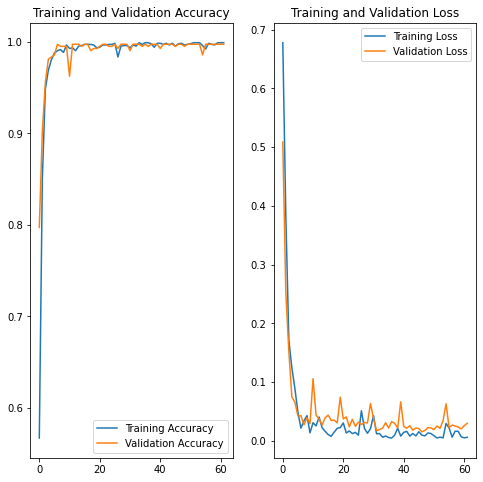

In [25]:
early_epoch = history.epoch[-1] + 1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

# 학습 종료시 epoch 기록
epochs_range = range(early_epoch)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
# 테스트 데이터 평가
test_set = image_dataset_from_directory(
    test_data,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)
loss, accuracy = model.evaluate(test_set)
print('Test Loss : ', loss)
print('Test Accuracy : ', accuracy)

Found 141 files belonging to 2 classes.
9/9 [==============================] - 9s 200ms/step - loss: 3.9527e-05 - accuracy: 1.0000
Test Loss :  3.9527472836198285e-05
Test Accuracy :  1.0
